### **INTRODUCTION TO COMPUTATIONAL MODELS**
#### **Assigment 4: Support Vector Machines**
- **Universidad de Córdoba**
- **Escuela Politécnica Superior de Córdoba**
- **Computer Science Engineering Degree**
- **Mention: Computation**
- **Fourth year - First quadrimester**
- **Author:** Ventura Lucena Martínez
- **Email:** <i72lumav@uco.es>
---

### **Abstract**
This lab assignment serves to familiarise with support vector machines (SVMs). In
this way, we will use the SVMs for various classification problems, to understand their
behaviour and, above all, the effect of their parameters. To do this, we will use the
[`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm) library, which is one of the most efficient implementations available nowadays,
as well as being free and open source.

### **Introduction**
In this lab assignment, we are going to carry out different exercises to better understand
the behaviour of support vector machines (SVMs) in classification problems. SVMs have
become, since some years ago, the state of the art in pattern recognition problems, and it
is important to know how they work and how they respond to their different parameters.

The lab assignment will be done using the `libsvm` library (included in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)), which is one of the most
popular and efficient implementations available nowadays. In all cases, we will consider
the “C-SVC” version, included in `libsvm`.

### **SVM parameters used**
- $kernel$: function used to project the information into a space of characteristics. When the data is not linearly separable, the kernel function is non linear.
- $C$: regularization parameter. The strength of the regularization is inversely proportional to $C$. Must be positive. The penalty is a quared *l*2 penalty.
- $\gamma$: coefficient for RBF, polynomial and sigmoidal kernels.

See more information [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

### **Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

### **2D representation of SVMs**
To make the graphic representation in two dimensions from Python, we are going to use the script `libsvm.py`.

### **Synthetic datasets**
#### **Dataset `dataset1.csv`**
Initially, we can see the predetermined SVM with the first dataset `dataset1.csv`. This SVM has the following parameters:
- $kernel$: linear.
- $C$: 1000.

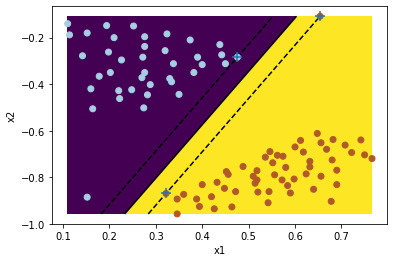

In [3]:
# Introduce the dataset here:
dataset = '../datasets/csv/dataset1.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train the SVM model.
svm_model = svm.SVC(kernel='linear', C=1000)
svm_model.fit(X, y)

# Plot the points.
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Plot the support vectors class regions, the separating hyperplane and the margins.
plt.axis('tight')
# |->Plot support vectors.
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], marker='+', s=100, zorder=10, cmap=plt.cm.Paired)

# |-> Extract the limits.
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# |-> Create a grid with all the points and then obtain the SVM score for all the points.
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# |-> Plot the results in a countour.
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, shading='auto')
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

As we can see in the previous figure, we can determine different components in the SVM methodology:
- **Hyperplanes:**
    - $H \equiv w_{1}x_{1}+w_{2}x_{2}+b = 0 \rightarrow$ Hyperplane that divides the purple and yellow regions.
    - $H^{+} \equiv w_{1}x_{1}+w_{2}x_{2}+b \geq 1 \rightarrow$ Hyperplane that defines the positive class. Anything on or above this boundary has label 1.
    - $H^{-} \equiv w_{1}x_{1}+w_{2}x_{2}+b \leq -1 \rightarrow$ Hyperplane that defines the negative class. Anything on or above this boundary has label -1.
- **Support Vectors**: points that make up the two lines parallel to the hyperplane $H$, beeing the distance between them (margin) the greatest possible.
- **Margin**: distance between a suppor vector and the hyperplane $H$.

After this first execution, we are supressing the code lines corresponding to the SVM's graphical representation, just to see the points of the dataset:

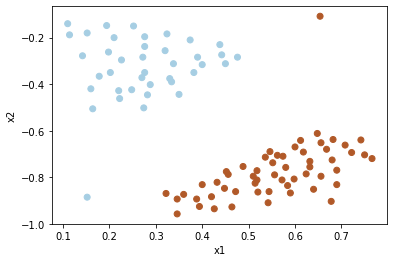

In [4]:
# Introduce the dataset here:
dataset = '../datasets/csv/dataset1.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Plot the points.
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

Intuitively, if we want to make the smallest possible mistake when separating the elements of the graph with an hyperplane, the solution would be, more or less accurate, as follows:

![Intuitively discrimination of the data](figures/Figure_1.png "Figure 1")

Let's try to use different values for parameter $C \in \{10^{-2}, 10^{-1}, 10^{0}, 10^{1}, 10^{2}, 10^{3}, 10^{4}\}$ . We have to note that a very big value of $C$ will result in an SVM that will make the minimum possible number of errors, while a small value of $C$ will favour a classifier with the maximum margin, even if errors are made. Of course, this is related to the possible over-fitting (learning noisy training patterns that can mislead the model):

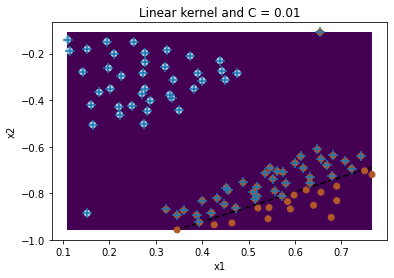

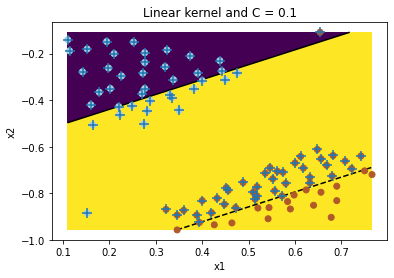

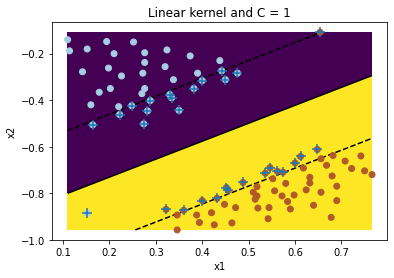

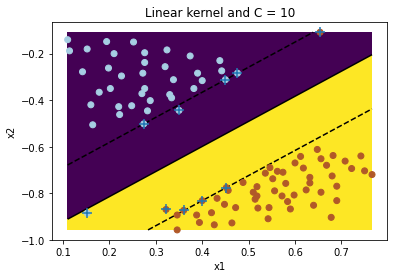

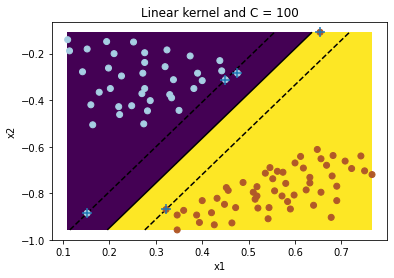

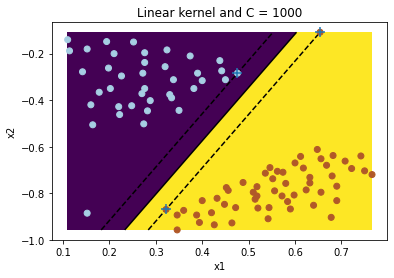

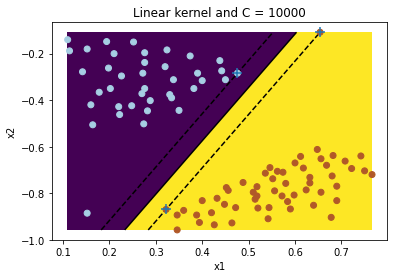

In [5]:
# Introduce the dataset here:
dataset = '../datasets/csv/dataset1.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

for i in range(-2, 5):
    # Train the SVM model.
    svm_model = svm.SVC(kernel='linear', C=10 ** i)
    svm_model.fit(X, y)

    # Plot the points.
    plt.figure(1)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Plot the support vectors class regions, the separating hyperplane and the margins.
    plt.axis('tight')
    # |->Plot support vectors.
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], marker='+', s=100, zorder=10, cmap=plt.cm.Paired)

    # |-> Extract the limits.
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # |-> Create a grid with all the points and then obtain the SVM score for all the points.
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # |-> Plot the results in a countour.
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, shading='auto')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Linear kernel and C = {10 ** i}')

    plt.show()

Taking a look at the previous plots, we can observe that not all the patterns are correctly classified until $C$ doesn't reach the value 1000, with a more restricted margin compared to the previous plot with $C$ value equal to 100, where the margin is wider, but with a wrong classified pattern.

#### **Dataset `dataset2.csv`**
In this case, we are running a linear SVM with the previous set of values for the $C$ parameter to see if we get any satisfactory results in the sense that there are no errors in the training set: 

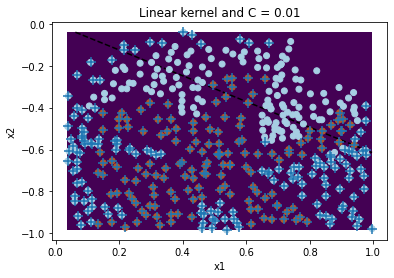

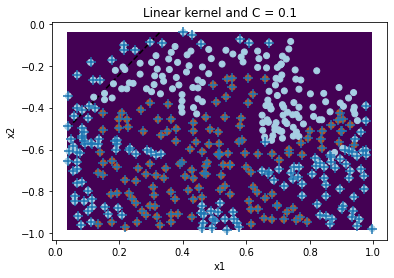

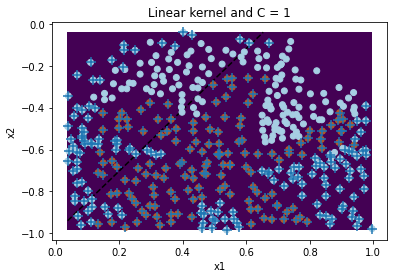

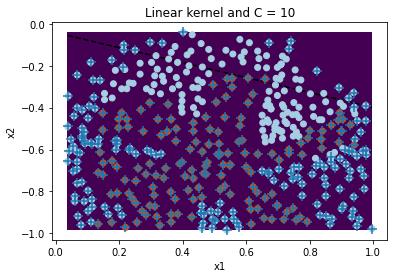

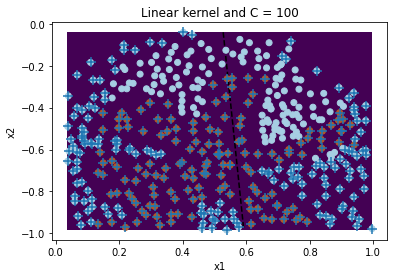

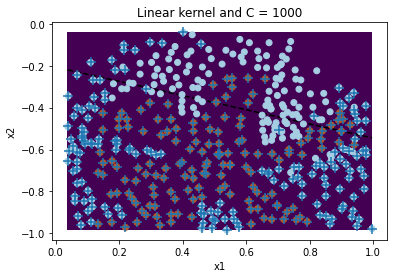

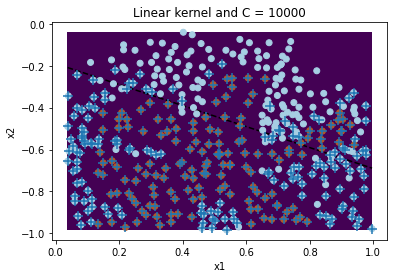

In [6]:
# Introduce the dataset here:
dataset = '../datasets/csv/dataset2.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

for i in range(-2, 5):
    # Train the SVM model.
    svm_model = svm.SVC(kernel='linear', C=10 ** i)
    svm_model.fit(X, y)

    # Plot the points.
    plt.figure(1)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Plot the support vectors class regions, the separating hyperplane and the margins.
    plt.axis('tight')
    # |->Plot support vectors.
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], marker='+', s=100, zorder=10, cmap=plt.cm.Paired)

    # |-> Extract the limits.
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # |-> Create a grid with all the points and then obtain the SVM score for all the points.
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # |-> Plot the results in a countour.
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, shading='auto')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Linear kernel and C = {10 ** i}')

    plt.show()

As we can see, no value for the parameter $C$ satisfies a good classification for the set of patterns. The reason is that the data is not linearly separable, so that, what we have to modify to correct this is not only the $C$ parameter, but also the $kernel$. To achieve non-linear separating hyperplanes, SVMs use the so-called kernel trick which, explained informally, builds a linear model in a many-dimensional space and projects it back to the original space, resulting in a non-linear model. This is achieved through the use of kernel functions applied to each of the training patterns. The most common one is the RBF kernel, also called Gaussian. In order to apply it, we have to specify an additional parameter ($gamma = \gamma = \frac{1}{radius}$). A high radius tends to softer solutions, with less over-fitting, while a small radius tends to produce more over-fitting. Running the algorithm with the following set of values for $\gamma \in \{10^{-2}, 10^{-1}, 10^{0}, 10^{1}, 10^{2}, 10^{3}, 10^{4}\}$ and the best selected $C = 1000$:

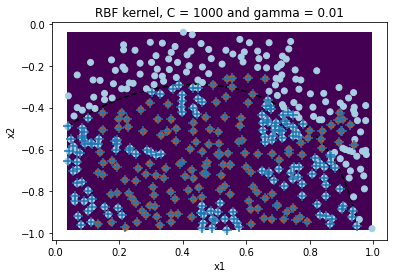

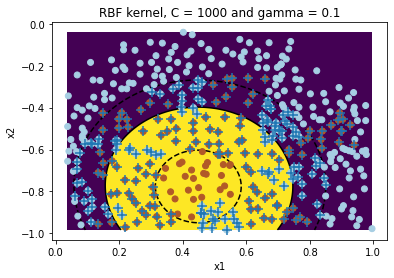

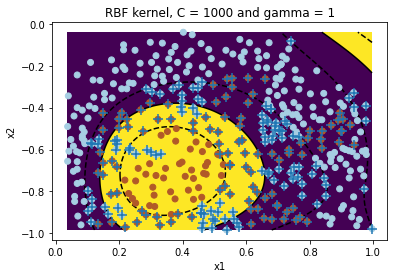

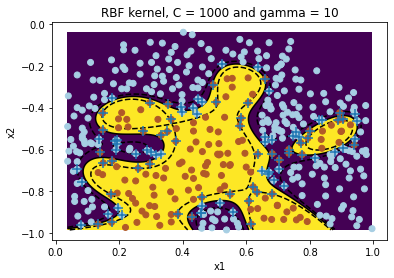

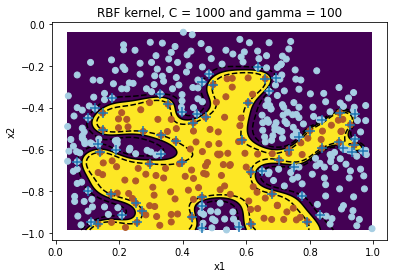

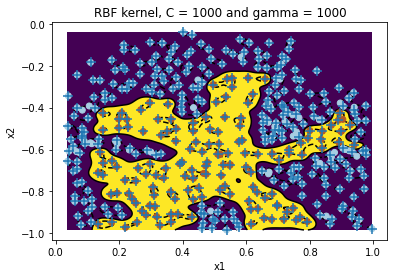

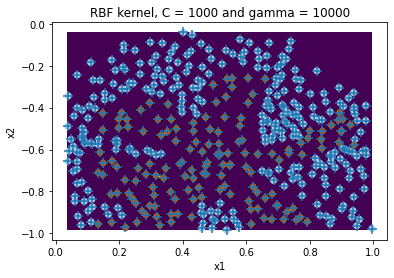

In [7]:
# Introduce the dataset here:
dataset = '../datasets/csv/dataset2.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

for i in range(-2, 5):
    # Train the SVM model.
    svm_model = svm.SVC(kernel='rbf', C= 1000, gamma=10 ** i)
    svm_model.fit(X, y)

    # Plot the points.
    plt.figure(1)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Plot the support vectors class regions, the separating hyperplane and the margins.
    plt.axis('tight')
    # |->Plot support vectors.
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], marker='+', s=100, zorder=10, cmap=plt.cm.Paired)

    # |-> Extract the limits.
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # |-> Create a grid with all the points and then obtain the SVM score for all the points.
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # |-> Plot the results in a countour.
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, shading='auto')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'RBF kernel, C = 1000 and gamma = {10 ** i}')

    plt.show()

The results are as follows:

| $kernel=RBF$, $C=1000$ |    Result   |
|:----------------------:|:-----------:|
| $\gamma=10^{-2}$       | Underfitted |
| $\gamma=10^{-1}$       | Underfitted |
| $\gamma=10^{0}$        | Underfitted |
| $\gamma=10^{1}$        |   Adjusted  |
| $\gamma=10^{2}$        |  Overfitted |
| $\gamma=10^{3}$        |  Overfitted |
| $\gamma=10^{4}$        |  Overfitted |

#### **Dataset `dataset3.csv`**
Finally, we are ending up with the third dataset of this category. First of all, as we proceeded previously, we are going to detect if the data is linearly separable:

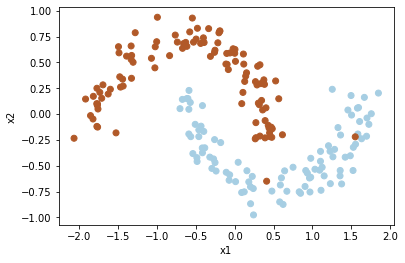

In [8]:
# Introduce the dataset here:
dataset = '../datasets/csv/dataset3.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Plot the points.
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

Due to the fact that we cannot separate the data with a straight line, this data is no linearly separable. Besides, we can identify three brown outliers in the class with the blue points.
After this first sight, we are applying a SVM classifier:

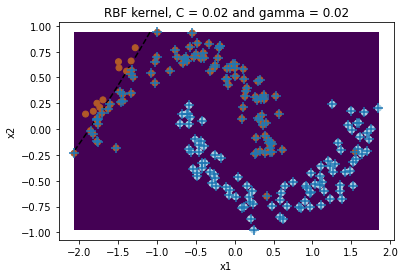

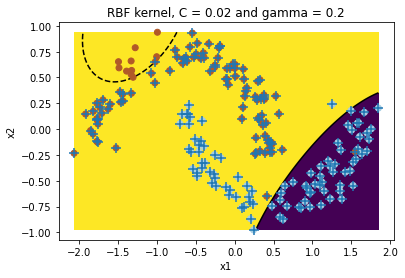

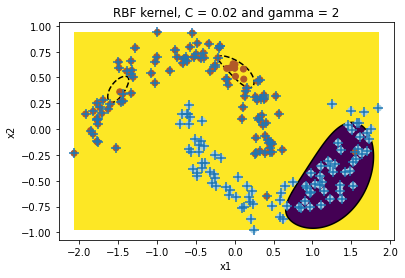

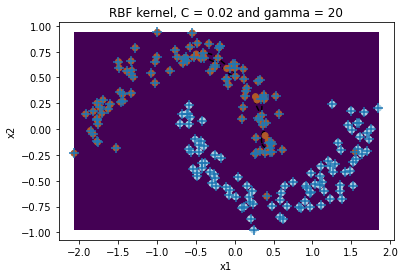

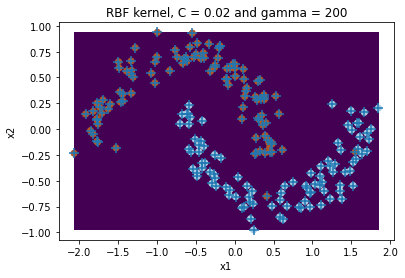

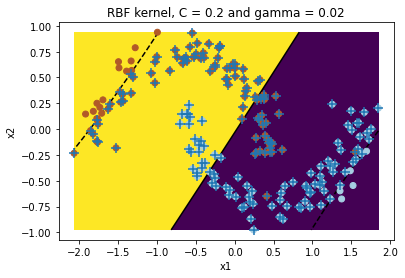

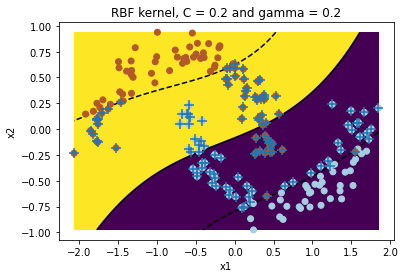

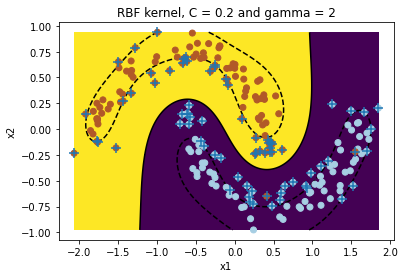

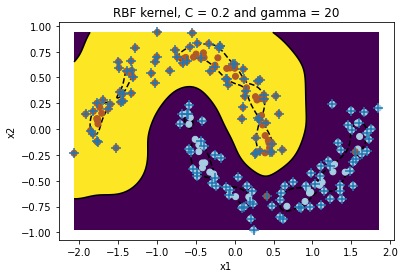

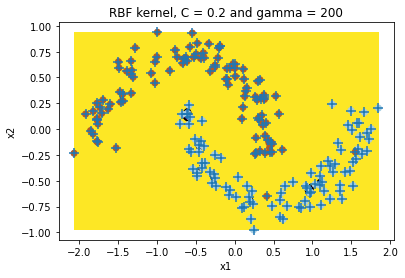

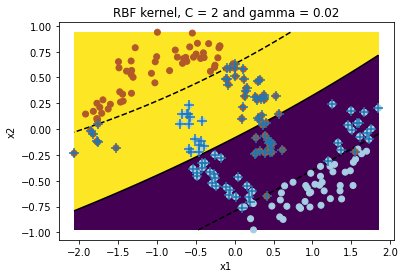

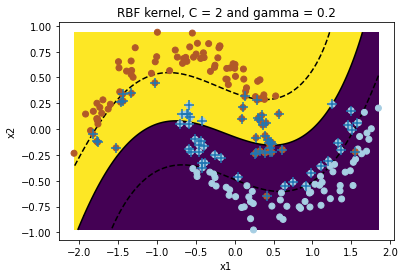

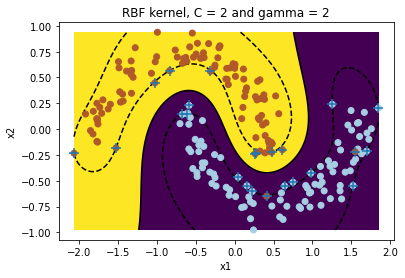

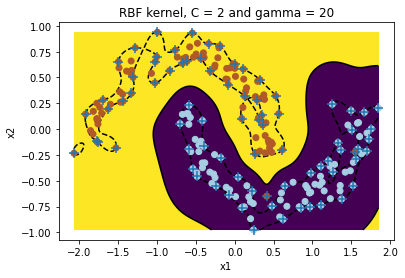

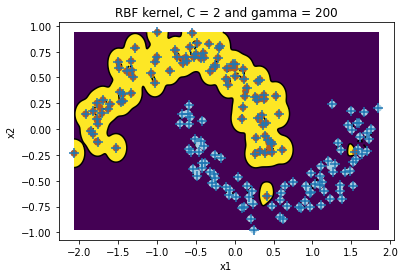

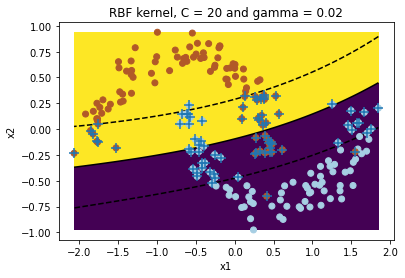

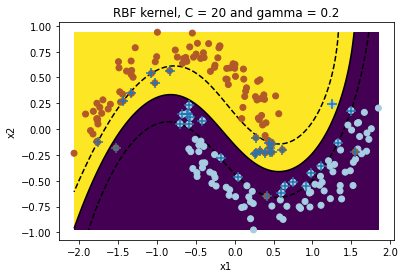

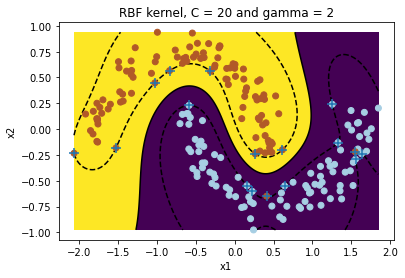

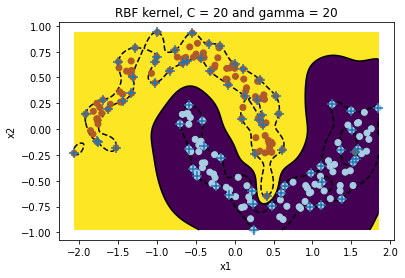

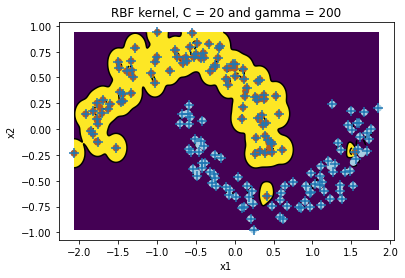

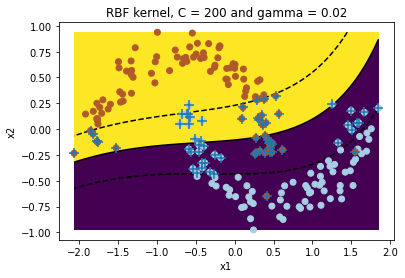

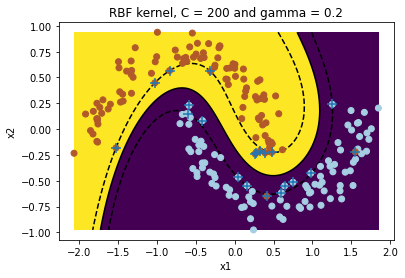

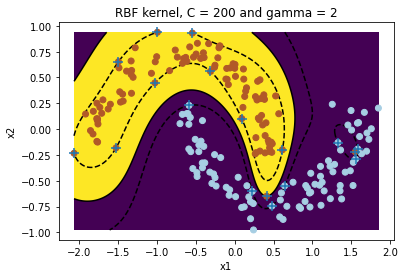

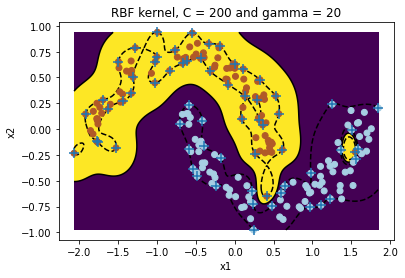

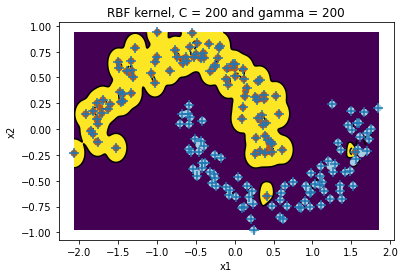

In [9]:
# Introduce the dataset here:
dataset = '../datasets/csv/dataset3.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

for c in range(-2, 3):
    for g in range(-2, 3):
        # Train the SVM model.
        svm_model = svm.SVC(kernel='rbf', C=2 * (10 ** c), gamma=2 * (10 ** g))
        svm_model.fit(X, y)

        # Plot the points.
        plt.figure(1)
        plt.clf()
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

        # Plot the support vectors class regions, the separating hyperplane and the margins.
        plt.axis('tight')
        # |->Plot support vectors.
        plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], marker='+', s=100, zorder=10, cmap=plt.cm.Paired)

        # |-> Extract the limits.
        x_min = X[:, 0].min()
        x_max = X[:, 0].max()
        y_min = X[:, 1].min()
        y_max = X[:, 1].max()

        # |-> Create a grid with all the points and then obtain the SVM score for all the points.
        XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # |-> Plot the results in a countour.
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0, shading='auto')
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title(f'RBF kernel, C = {2 * (10 ** c)} and gamma = {2 * (10 ** g)}')

        plt.show()

|   kernel=RBF  |    Result   |  kernel=RBF  |    Result   |
|:-------------:|:-----------:|:------------:|:-----------:|
| C=0.02/g=0.02 | Underfitted |   C=2/g=20   |  Overfitted |
|  C=0.02/g=0.2 | Underfitted |   C=2/g=200  |  Overfitted |
|   C=0.02/g=2  | Underfitted |  C=20/g=0.02 | Underfitted |
|  C=0.02/g=20  | Underfitted |  C=20/g=0.2  | Underfitted |
|  C=0.02/g=200 | Underfitted |   C=20/g=2   |   Adjusted  |
|  C=0.2/g=0.02 | Underfitted |   C=20/g=20  |  Overfitted |
|  C=0.2/g=0.2  | Underfitted |  C=20/g=200  |  Overfitted |
|   C=0.2/g=2   | Underfitted | C=200/g=0.02 | Underfitted |
|   C=0.2/g=20  |  Overfitted |  C=200/g=0.2 |  Adjusted*  |
|  C=0.2/g=200  | Underfitted |   C=200/g=2  |  Overfitted |
|   C=2/g=0.02  | Underfitted |  C=200/g=20  |  Overfitted |
|   C=2/g=0.2   | Underfitted |  C=200/g=200 |  Overfitted |
|    C=2/g=2    |  Adjusted*  |              |             |

(*) Adjusted with few errors.

Then, we are going to divide the synthetic dataset into two stratified random subsets, with 75% of patterns for training set and 25% of patterns for the test set. We are making a complete training process (standardization, training and prediction), optimizing again the values of $C$ and $\gamma$ obtained previously. We are also computing the accuracy obtained for the test set.

Accuracy of the model = 0.9411764705882353.


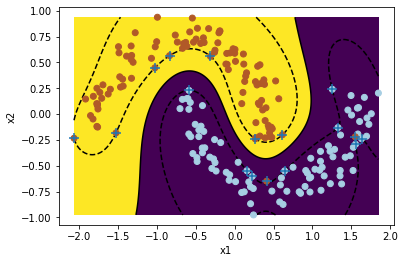

In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Standardize features by removing the mean and scaling to unit variance.
scaler = preprocessing.StandardScaler()

# Introduce the dataset here:
dataset = '../datasets/csv/dataset3.csv'

# Load the dataset.
data = pd.read_csv(dataset, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Fit to data, then transform it.
X_train = scaler.fit_transform(X, y)

# Split the data:
#   Train patterns: 75%.
#   Test patterns:  25%.
x_train, x_test, y_train, y_test = train_test_split(X_train, y, stratify=y, test_size=0.25)

# Train the SVM model.
svm_model = svm.SVC(kernel='rbf', C=20, gamma=2)
svm_model.fit(X, y)

# Print the accuracy of the model:
print(f'Accuracy of the model = {svm_model.score(x_test, y_test)}.')

# Plot the points.
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Plot the support vectors class regions, the separating hyperplane and the margins.
plt.axis('tight')
# |->Plot support vectors.
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], marker='+', s=100, zorder=10, cmap=plt.cm.Paired)

# |-> Extract the limits.
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# |-> Create a grid with all the points and then obtain the SVM score for all the points.
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# |-> Plot the results in a countour.
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, shading='auto')
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

This process has a small inconvenience and it is that it is necessary to specify a value for the parameter $C$ and a value for the parameter $\gamma$ (width of the kernel, in case we want a non-linear classifier) and, as we already saw in the first part of the lab assignment, these parameters are very sensitive. To avoid this, there is a way to automatically adjust the parameters, following a [Stratified K-fold nested cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold):
1. Make a K-fold partition (where $K$ is a parameter) of the training data. That is, divide the training data into $K$ disjoint subsets.
2. For each combination of parameters, perform $K$ training processes. For each training $k$ from the $K$ total processes:
    1. Use the subset $k$ as a test set (validation) and the rest of the subsets as a training set.
    2. Accumulate the test error in a variable.
At the end, calculate the average test error made during the $K$ trainings. The crossvalidation process is repeated in full for all possible combinations of $C$ and $\gamma$ parameters.
3. Choose the combination of parameters that resulted in the least average error in the previous step and take those parameter values as the optimal values.
4. Using these parameters, repeat the training process but now consider the complete training set (no subsets).
5. With the model obtained in the previous step, check what is the error in test (actual test phase).

In `scikit-learn`, we can apply this process using the object [`sklearn.grid_search.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [14]:
from sklearn.model_selection import GridSearchCV

Cs = np.logspace(-3, 3, num=7, base=10)
Gs = np.logspace(-3, 3, num=7, base=10)

optimal = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs), n_jobs=-1, cv=5)
optimal.fit(x_train, y_train)

print(f'Optimal value = {optimal.score(x_test, y_test)}.')

Optimal value = 1.0.


As we can see, we did not reach the best configuration of the parameters (`0.9411764705882353`), because the optimal value obtained is `1.0`.

To be sure that we understand how the parameter search is performed, we are implementing manually (without using `GridSearchCV`) the *K-fold nested cross validation* and then comparing the results with those obtained using `GridSearchCV`.

In [18]:
from sklearn.model_selection import StratifiedKFold

# Stratified K-Folds cross-validator (K=5).
skf = StratifiedKFold(n_splits=5)

Cs_Gs_results_matrix = np.zeros((len(Cs) * len(Gs), 7))

i = 2
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    j = 0
    
    for c in Cs:
        for g in Gs:
            train = svm.SVC(kernel='rbf', C=c, gamma=g).fit(X_train_fold, y_train_fold)
            
            if i == 2:
                Cs_Gs_results_matrix[j, 0] = c
                Cs_Gs_results_matrix[j, 1] = g
            
            Cs_Gs_results_matrix[j, i] = train.score(X_test_fold, y_test_fold)
            j += 1
    i += 1

maxJ = 0
maxMean = np.mean(Cs_Gs_results_matrix[0, 2:7])

for x in range(1, (len(Cs) * len(Gs))):
    mean = np.mean(Cs_Gs_results_matrix[x, 2:7])

    if mean > maxMean:
        maxMean = mean
        maxJ = x

optimal = svm.SVC(kernel='rbf', C=Cs_Gs_results_matrix[maxJ, 0], gamma=Cs_Gs_results_matrix[maxJ, 1])

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

optimal.fit(x_train, y_train)
print(f'Optimal value = {optimal.score(x_test, y_test)}.')

Optimal value = 1.0.


---

### **Real-world datasets**
In this part we are going to tackle various real problems, in order to see its applicability to more complex databases.

#### ***[`noMNIST`](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html)* dataset**
Originally, this dataset was composed by 200000 training patterns and 10000 test patterns, with a total of 10 classes. Nevertheless, for this lab assignment, the size of the dataset has been reduced in order to reduce the computational cost. In this sense, the dataset is composed by 900 training patterns and 300 test patterns. It includes a set of letters (from a to *f*) written with different typologies or symbols. They are adjusted to a squared grid of 28 × 28 pixels. The images are in grey scale in the interval [−1.0; +1.0]. Each of the pixels is an input variable (with a total of 28 × 28 = 784 input variables) and the class corresponds to a written letter (*a*, *b*, *c*, *d*, *e* y *f*, with a total of 6 classes).

We are defining a function that computes, as we have done previously, the *RBF K-fold cross-validation*:

In [24]:
import time

def svm_kfold_cross_validator(train_dataset, test_dataset, k):
    start = time.time()
    
    # Load the dataset.
    data_train = pd.read_csv(train_dataset, header=None)
    data_test = pd.read_csv(test_dataset, header=None)
    
    x_train = data_train.iloc[:,:-1].values
    y_train = data_train.iloc[:,-1].values
    x_test = data_test.iloc[:,:-1].values
    y_test = data_test.iloc[:,-1].values
    
    # Return numbers spaced evenly on a log scale.
    Cs = np.logspace(-2, 4, num=7, base=10)
    Gs = np.logspace(-2, 4, num=7, base=10)
    
    svm_model = svm.SVC(kernel='rbf',C=100, gamma=1)
    svm_model.fit(x_train, y_train)

    optimal = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1, cv=k)
    optimal.fit(x_train, y_train)

    end = time.time()

    print(f'Optimal value = {optimal.score(x_test, y_test)}.')
    print(f'Time (s) = {end - start}')

Running the above funtion with the following parameters (it is going to take some time):
- Train dataset:    '../datasets/csv/train_nomnist.csv'
- Test dataset:     '../datasets/csv/test_nomnist.csv'
- k:                5

In [26]:
svm_kfold_cross_validator('../datasets/csv/train_nomnist.csv', '../datasets/csv/test_nomnist.csv', 3)

Optimal value = 0.7833333333333333.
Time (s) = 46.0824031829834


In [27]:
svm_kfold_cross_validator('../datasets/csv/train_nomnist.csv', '../datasets/csv/test_nomnist.csv', 5)

Optimal value = 0.7833333333333333.
Time (s) = 128.39185690879822


In [28]:
svm_kfold_cross_validator('../datasets/csv/train_nomnist.csv', '../datasets/csv/test_nomnist.csv', 10)

Optimal value = 0.7833333333333333.
Time (s) = 274.2455027103424


#### ***`spam`* classification dataset**
One of the main fields where machine learning is successfully used is the automatic detection of spam on mail servers. Most of these filters use binary classification techniques internally (spam mail, y = 1, or non-spam, y = 0) and the use of techniques based on SVMs is gaining more and more acceptance. In this section, we are going to explain the steps carried out to preprocess the text of an email and convert it into a feature vector able to be used as input in any classifier.

To see the steps carried out to preprocess the text of an email and convert it into a feature vector able to be used as input in any classifier: see section 3.2 of the assignment script.

We are going to train a linear SVM model with the values $C \in \{10^{-2}, 10^{-1}, 10^{0}, 10^{1}\}$ using the following script:

In [37]:
from sklearn.metrics import confusion_matrix

start = time.time()

# Introduce the datasets here:
train_dataset = '../datasets/csv/train_spam.csv'
test_dataset = '../datasets/csv/test_spam.csv'

# Load the dataset.
data_train = pd.read_csv(train_dataset, header=None)
data_test = pd.read_csv(test_dataset, header=None)

x_train = data_train.iloc[:,:-1].values
y_train = data_train.iloc[:,-1].values
x_test = data_test.iloc[:,:-1].values
y_test = data_test.iloc[:,-1].values

scaler = preprocessing.StandardScaler()

Cs = np.logspace(-2, 1, num=4, base=10)
Gs = np.logspace(-2, 1, num=4, base=10)
    
svm_model = svm.SVC(kernel='linear',C=100, gamma=1)
svm_model.fit(x_train, y_train)

optimal = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs), n_jobs=-1, cv=5)
optimal.fit(x_train, y_train)
    
print(f'Optimal value = {optimal.score(x_test, y_test)}.')
    
predict = optimal.predict(x_test)
cm = confusion_matrix(y_test, predict)
print(cm)
    
for i in range(predict.shape[0]):
    if predict[i] != y_test[i]:
        print(f"Email {i + 1}, {'SPAM' if y_test[i] == 1 else 'NO SPAM'}  - Predicted:  {'SPAM' if predict[i] == 1 else 'NO SPAM'}")

end = time.time()
print(f'Time (s) = {end - start}')

Optimal value = 0.989.
[[684   8]
 [  3 305]]
Email 10, SPAM  - Predicted:  NO SPAM
Email 22, NO SPAM  - Predicted:  SPAM
Email 59, NO SPAM  - Predicted:  SPAM
Email 74, NO SPAM  - Predicted:  SPAM
Email 148, NO SPAM  - Predicted:  SPAM
Email 329, NO SPAM  - Predicted:  SPAM
Email 408, SPAM  - Predicted:  NO SPAM
Email 527, NO SPAM  - Predicted:  SPAM
Email 561, NO SPAM  - Predicted:  SPAM
Email 843, NO SPAM  - Predicted:  SPAM
Email 882, SPAM  - Predicted:  NO SPAM
Time (s) = 195.72180199623108


We have obtained good results. It seems that 3 emails have been categorized as no spam, while they are spam. Let's see which are the words that appear in each email:

In [39]:
def getEmailKeywords(email):
    # Introduce the dataset here:
    keywords_dataset = '../vocab.txt'

    # Load the dataset.
    keywords = pd.read_csv(keywords_dataset, header=None, sep='\t')

    # Take the row that fulfill email = <email> and its selected words in data_test.
    keywords_indexes = np.where(data_test.iloc[email - 1, :-1].values == 1)

    df = pd.DataFrame(keywords)
    keywords = df[df.columns[1]]

    # Print the words.
    for i in keywords_indexes[0]:
        print(keywords[i])

In [40]:
getEmailKeywords(email=10)

emailaddr
for
group
httpaddr
inform
irish
linux
list
maintain
subscript
un
user


If we try with a non-linear SVM:

In [38]:
start = time.time()

# Introduce the datasets here:
train_dataset = '../datasets/csv/train_spam.csv'
test_dataset = '../datasets/csv/test_spam.csv'

# Load the dataset.
data_train = pd.read_csv(train_dataset, header=None)
data_test = pd.read_csv(test_dataset, header=None)

x_train = data_train.iloc[:,:-1].values
y_train = data_train.iloc[:,-1].values
x_test = data_test.iloc[:,:-1].values
y_test = data_test.iloc[:,-1].values

scaler = preprocessing.StandardScaler()

Cs = np.logspace(-2, 1, num=4, base=10)
Gs = np.logspace(-2, 1, num=4, base=10)
    
svm_model = svm.SVC(kernel='rbf',C=100, gamma=1)
svm_model.fit(x_train, y_train)

optimal = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs), n_jobs=-1, cv=5)
optimal.fit(x_train, y_train)
    
print(f'Optimal value = {optimal.score(x_test, y_test)}.')
    
predict = optimal.predict(x_test)
cm = confusion_matrix(y_test, predict)
print(cm)
    
for i in range(predict.shape[0]):
    if predict[i] != y_test[i]:
        print(f"Email {i + 1}, {'SPAM' if y_test[i] == 1 else 'NO SPAM'}  - Predicted:  {'SPAM' if predict[i] == 1 else 'NO SPAM'}")

end = time.time()
print(f'Time (s) = {end - start}')

Optimal value = 0.99.
[[688   4]
 [  6 302]]
Email 10, SPAM  - Predicted:  NO SPAM
Email 22, NO SPAM  - Predicted:  SPAM
Email 50, NO SPAM  - Predicted:  SPAM
Email 91, SPAM  - Predicted:  NO SPAM
Email 118, SPAM  - Predicted:  NO SPAM
Email 209, NO SPAM  - Predicted:  SPAM
Email 305, SPAM  - Predicted:  NO SPAM
Email 329, NO SPAM  - Predicted:  SPAM
Email 792, SPAM  - Predicted:  NO SPAM
Email 882, SPAM  - Predicted:  NO SPAM
Time (s) = 1187.1317903995514


In [41]:
getEmailKeywords(email=10)

emailaddr
for
group
httpaddr
inform
irish
linux
list
maintain
subscript
un
user
